In [44]:
import pandas as pd
a = pd.read_csv('student-por.csv')
a.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [45]:
a['pass'] = a.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1)
a = a.drop(['G1','G2','G3'], axis=1)
a.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [46]:
a = pd.get_dummies(a, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason','guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher','internet', 'romantic'])
a.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [60]:
import numpy as np

a = a.sample(frac=1) #split training and testing data

a_train = a[:500]
a_test = a[500:]

a_train_att = a_train.drop(['pass'], axis=1)
a_train_pass = a_train['pass']

a_test_att = a_test.drop(['pass'], axis=1)
a_test_pass = a_test['pass']

a_att = a.drop(['pass'], axis=1)
a_pass = a['pass']

#number of passing students in whole dataset:
print("passing: %d out of %d (%.2f%%)" % (np.sum(a_pass), len(a_pass), 100*float(np.sum(a_pass)) / len(a_pass)))

passing: 328 out of 649 (50.54%)


In [85]:
from sklearn.tree import tree
test = tree.DecisionTreeClassifier(criterion="entropy", max_depth=6)
test = test.fit(a_train_att, a_train_pass)

In [86]:
test.score(a_test_att, a_test_pass)

0.7114093959731543

In [89]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(test, a_att, a_pass, cv=6)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.63 (+/- 0.09)


In [90]:
for max_depth in range(1, 20):
    test = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(test, a_att, a_pass, cv=6)
    print("Max Depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))
    

Max Depth: 1, Accuracy: 0.61 (+/- 0.08)
Max Depth: 2, Accuracy: 0.69 (+/- 0.06)
Max Depth: 3, Accuracy: 0.69 (+/- 0.07)
Max Depth: 4, Accuracy: 0.70 (+/- 0.05)
Max Depth: 5, Accuracy: 0.70 (+/- 0.07)
Max Depth: 6, Accuracy: 0.68 (+/- 0.09)
Max Depth: 7, Accuracy: 0.67 (+/- 0.06)
Max Depth: 8, Accuracy: 0.66 (+/- 0.08)
Max Depth: 9, Accuracy: 0.66 (+/- 0.06)
Max Depth: 10, Accuracy: 0.65 (+/- 0.09)
Max Depth: 11, Accuracy: 0.65 (+/- 0.09)
Max Depth: 12, Accuracy: 0.64 (+/- 0.10)
Max Depth: 13, Accuracy: 0.63 (+/- 0.08)
Max Depth: 14, Accuracy: 0.64 (+/- 0.09)
Max Depth: 15, Accuracy: 0.63 (+/- 0.08)
Max Depth: 16, Accuracy: 0.63 (+/- 0.09)
Max Depth: 17, Accuracy: 0.63 (+/- 0.09)
Max Depth: 18, Accuracy: 0.62 (+/- 0.10)
Max Depth: 19, Accuracy: 0.63 (+/- 0.08)


In [91]:
depth_acc = np.empty((19, 3), float)
i = 0
for max_depth in range(1, 20):
    test = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(test, a_att, a_pass, cv=6)
    depth_acc[i, 0] = max_depth
    depth_acc[i, 1] = scores.mean()
    depth_acc[i, 2] = scores.std() * 2
    i += 1
depth_acc
    

array([[ 1.        ,  0.61476385,  0.08235669],
       [ 2.        ,  0.68719561,  0.05924687],
       [ 3.        ,  0.69178276,  0.07454761],
       [ 4.        ,  0.70102786,  0.04850651],
       [ 5.        ,  0.70257107,  0.07731244],
       [ 6.        ,  0.68408087,  0.0993526 ],
       [ 7.        ,  0.67483577,  0.05279374],
       [ 8.        ,  0.6578463 ,  0.07230932],
       [ 9.        ,  0.65943199,  0.06957067],
       [10.        ,  0.65018688,  0.07662984],
       [11.        ,  0.63632631,  0.09533394],
       [12.        ,  0.64707215,  0.0828305 ],
       [13.        ,  0.64249915,  0.07505556],
       [14.        ,  0.64714294,  0.07966939],
       [15.        ,  0.64094178,  0.09097218],
       [16.        ,  0.62862442,  0.09272993],
       [17.        ,  0.64102673,  0.10864461],
       [18.        ,  0.63948352,  0.08065369],
       [19.        ,  0.61945011,  0.10602604]])

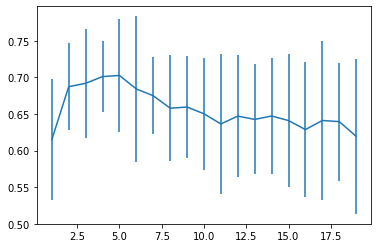

In [92]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:, 0], depth_acc[:, 1], yerr = depth_acc[:, 2])
plt.show()
